<a href="https://colab.research.google.com/github/TurboGooseEdu/machine-learning/blob/task-1/task1-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Разведочный анализ (EDA)

- [x] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [x] Считать данные и вывести их основные характеристики, описание признаков.
- [x] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [x] (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [x] Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [x] (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [x] (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.preprocessing as s

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Датасет
Используемый [датасет](https://www.kaggle.com/datasets/lava18/google-play-store-apps), содержит данные по приложениям из Google Play.

## Описание признаков

- `App` — Название приложения
- `Category` — Категория приложения
- `Rating` — Рейтинг приложения
- `Reviews` — Число пользовательских отзывов
- `Size` — Размер приложения
- `Installs` — Число загрузок приложения
- `Type` — Платное приложение или бесплатное
- `Price` — Цена приложения
- `Content Rating` — Возрастная группа целевых пользователей
- `Genres` — Жанры, которым принадлежат приложение
- `Last Updated` — Дата последней загрузки приложения разработчиком
- `Current Ver` — Текущая версия приложения
- `Android Ver` — Минимально поддерживаемая версия Android

Целевым признаком будет `Rating`

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ml/datasets/googleplaystore.csv')

Сразу удалим признаки с отсутствующей предсказательной способностью

In [3]:
df.drop(columns=["App", "Last Updated", "Current Ver", "Android Ver"], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


Видно, что некоторые колонки, которые по логике должны быть числовыми (например, `Reviews`, `Size`, `Installs` и др.) имеют тип `object`, значит потребуют дополнительного преобразования

Проверим количество пропусков в данных

In [5]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

Таким образом, из почти 11000 записей 1500 не имеют целевого признака. При заполнении их какими-либо значениями они лишь будут вносить шум в итоговую модель, поэтому рациональнее будет исключить их.

In [6]:
df.dropna(subset=["Rating"], inplace=True)

In [7]:
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
dtype: int64

Рассмотрим записи с отсутствующим признаком `Content Rating`

In [8]:
df[df["Content Rating"].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


Судя по всему, в этой записи поля съехали влево. Исключим ее.

In [9]:
df.dropna(subset=["Content Rating"], inplace=True)

In [10]:
df.describe(include="all")

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,9366,9366.000000,9366,9366,9366,9366,9366,9366,9366
unique,33,NaN,5992,414,19,2,73,6,115
top,FAMILY,NaN,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools
freq,1747,NaN,83,1637,1577,8719,8719,7420,733
mean,NaN,4.191757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.515219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Рассмотрим распределение целевого признака

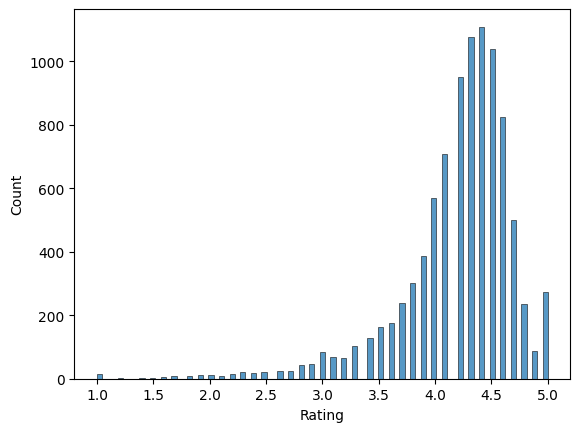

In [11]:
sns.histplot(df, x="Rating");

## Рассмотрим количество приложений в зависимости от категории

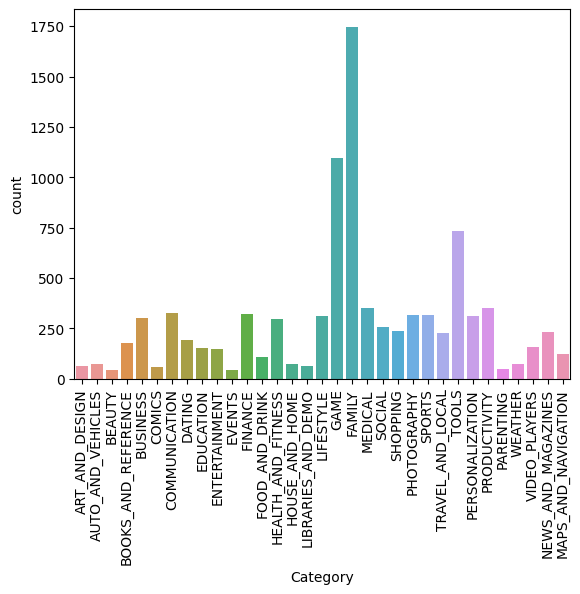

In [12]:
cat_cnt_plot = sns.countplot(df, x="Category")
cat_cnt_plot.set_xticklabels(cat_cnt_plot.get_xticklabels(), rotation=90);

## Рассмотрим соотношение платных и бесплатных приложений

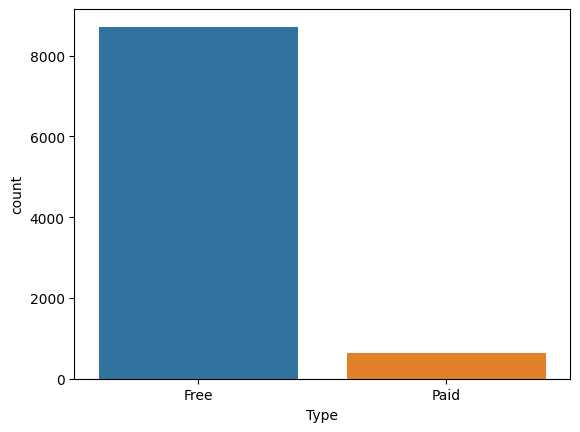

In [13]:
sns.countplot(df, x="Type");

Гипотеза: рейтинг приложения в первую очередь зависит от категории и платности/бесплатности скачивания.

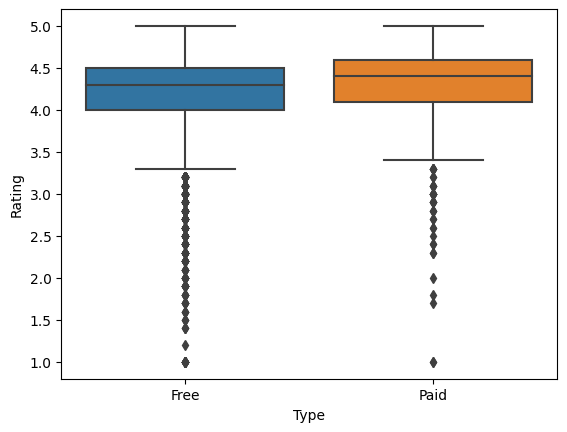

In [14]:
sns.boxplot(x="Type", y="Rating", data=df);

Можно видеть, что результаты примерно одинаковые в случае платных и бесплатных приложений. Однако, у бесплатных приложений чаще встречается низкий рейтинг, поскольку их в целом больше + бесплатность потенциально понижает требования по качеству.

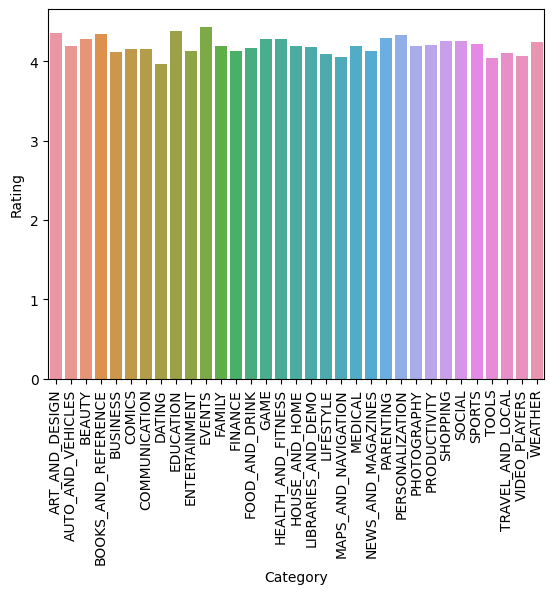

In [15]:
means_by_categories = df.groupby(['Category'])['Rating'].mean().reset_index()
mean_rating_plot = sns.barplot(x='Category', y='Rating', data=means_by_categories)
mean_rating_plot.set_xticklabels(mean_rating_plot.get_xticklabels(), rotation=90);

Можно видеть, что средний рейтинг незначительно зависит от категории, значит исходная гипотеза была неверна.

Выполним преобразования данных

In [16]:
def convert_installs(installs):
  return pd.to_numeric(installs.replace("+", "").replace(",", ""))

df["Installs"] = df["Installs"].apply(convert_installs)

In [18]:
def convert_price(price):
  if price == "Free":
    return 0
  return pd.to_numeric(price.replace("$", ""))

df["Price"] = df["Price"].apply(convert_price)

In [19]:
def convert_size(size):
  if size == "Varies with device":
    return 0
  val = pd.to_numeric(size[:-1])
  if size[-1] == "M":
    val *= 1000
  return val


df["Size"] = df["Size"].apply(convert_size)

Закодируем категориальные признаки

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Category"] = le.fit_transform(df["Category"])
df["Type"] = le.fit_transform(df["Type"])
df["Content Rating"] = le.fit_transform(df["Content Rating"])
df["Genres"] = le.fit_transform(df["Genres"])

Рассмотрим корреляцию полученных признаков

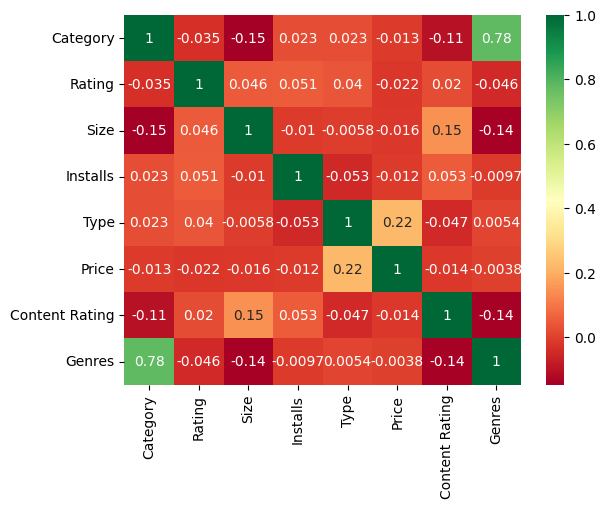

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn');

Заметная корреляция наблюдается только между жанрами и категориями, поскольку жанры частично включают в себя категории. Признак жанра не является атомарным, тк он может содержать несколько значений, перечисленных через точку с запятой. Таким образом, признак жанра потенциально содержит больше информации, чем признак категории, однако требует более сложной обработки, поэтому на данном этапе его можно было бы ислючить для упрощения модели.

In [22]:
df.drop(columns=["Genres"], inplace=True)

Таким образом, результирующий датасет принимает следующую форму

In [23]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,4.1,159,19000.0,10000,0,0.0,1
1,0,3.9,967,14000.0,500000,0,0.0,1
2,0,4.7,87510,8700.0,5000000,0,0.0,1
3,0,4.5,215644,25000.0,50000000,0,0.0,4
4,0,4.3,967,2800.0,100000,0,0.0,1
